#Model Quality and Improvements-Diabetes Prediction


## 1. Defining the Question

### a) Specifying the Data Analysis Question

A Pharmaceutical company requires amodel that predicts whether a patient will be diagnosed with diabetes

### b) Defining the Metric for Success

We will have accomplished our objective if we build a model (accuarcy score>0.85) that predicts whether a patient will be diagnosed with diabetes

### c) Understanding the Context

As a data professional working for a pharmaceutical company, you need to develop a
model that predicts whether a patient will be diagnosed with diabetes. The model needs
to have an accuracy score greater than 0.85.

### d) Recording the Experimental Design

1. Load libraries and datasets.
2. Prepare the data
3. Analyze the data
4. Build model, test and evaluate it
5. Conclusions and recommendation

### e) Data Relevance

The given data sets were relevant in answering the research question.

## 2. Data Cleaning & Analysis

In [ ]:
# Loading the required libraries



import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



In [ ]:
#read dataset
diabetes_df=pd.read_csv("https://bit.ly/DiabetesDS")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.shape

(768, 9)

In [ ]:
#check null values in each column
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

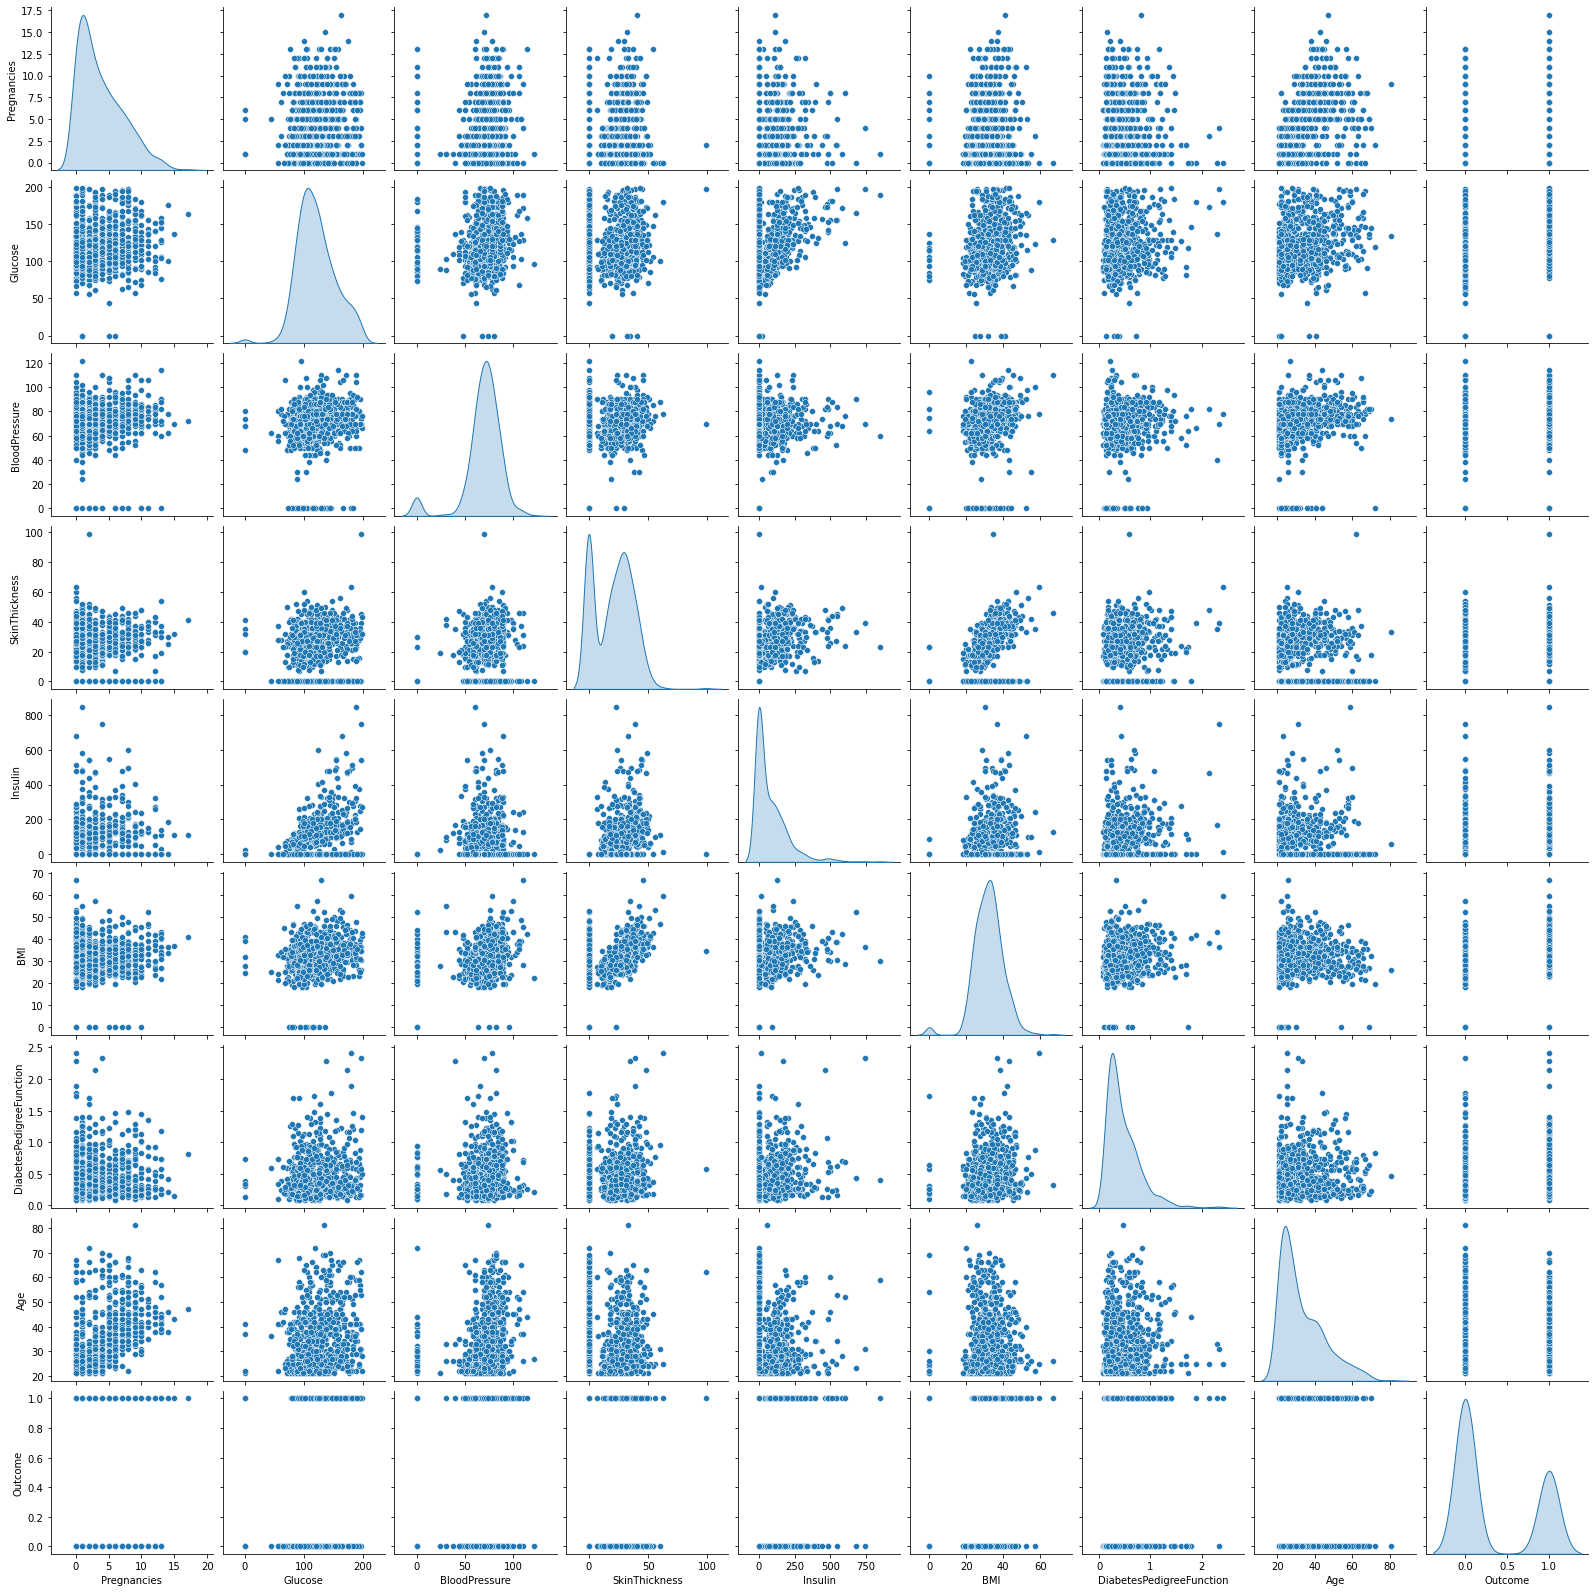

In [ ]:
# visualize data 
sns.pairplot(data=diabetes_df, diag_kind='kde')

In [ ]:
#check class balance
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#get target and features
target = diabetes_df_new['Outcome']
features = diabetes_df_new.drop(['Outcome'], axis=1)
features = features.drop(['Insulin'], axis=1)



features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

#upsampling the minority class
repeat = 2
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

#split dataset into train and test data
features_train, features_valid, target_train, target_valid = train_test_split(
    features_upsampled, target_upsampled, test_size=0.25
  )


In [ ]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,33.6,0.627,50
1,1,85,66,29,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,23,28.1,0.167,21
5,5,116,74,0,25.6,0.201,30


##Random Forest

In [ ]:
#tune hyperparameters to get the best to use to  give  best model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,1],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(features_train, target_train)

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:

#apply hyper parameters and evaluate model

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = RandomForestClassifier(random_state=12345, max_features='auto', n_estimators= 500, max_depth=8, min_samples_leaf=1)

#train model
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

#check accuracy score of model

print('Random Forest: ROC AUC = ',str(round(roc_auc_score(target_valid, predicted_valid)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(target_valid, predicted_valid)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(target_valid, predicted_valid)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(target_valid, predicted_valid)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(target_valid, predicted_valid)*100,1)), '%')


Random Forest: ROC AUC =  73.6 %
Random Forest: Precision =  84.9 %
Random Forest: Recall =  100.0 %
Random Forest: Accuracy =  86.7 %
Random Forest: F1-Score =  91.8 %


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

l_reg = LogisticRegression(penalty = 'l2',random_state = 0)
l_reg.fit(features_train, target_train)

# Predict the test data
y_predicted = l_reg.predict(features_valid)


print('LogisticRegression: ROC AUC = ',str(round(roc_auc_score(target_valid, y_predicted)*100,1)), '%')
print('LogisticRegression: Precision = ',str(round(precision_score(target_valid, y_predicted)*100,1)), '%')
print('LogisticRegression: Recall = ',str(round(recall_score(target_valid, y_predicted)*100,1)), '%')
print('LogisticRegression: Accuracy = ',str(round(accuracy_score(target_valid, y_predicted)*100,1)), '%')
print('LogisticRegression: F1-Score = ',str(round(f1_score(target_valid, y_predicted)*100,1)), '%')

LogisticRegression: ROC AUC =  63.5 %
LogisticRegression: Precision =  80.3 %
LogisticRegression: Recall =  98.7 %
LogisticRegression: Accuracy =  81.0 %
LogisticRegression: F1-Score =  88.6 %


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=12345)

#fit and train model
dt_model.fit(features_train, target_train)

# Predict the test data
dt_predicted = dt_model.predict(features_valid)


print('DecisionTree: ROC AUC = ',str(round(roc_auc_score(target_valid, dt_predicted)*100,1)), '%')
print('DecisionTree: Precision = ',str(round(precision_score(target_valid, dt_predicted)*100,1)), '%')
print('DecisionTree: Recall = ',str(round(recall_score(target_valid, dt_predicted)*100,1)), '%')
print('DecisionTree: Accuracy = ',str(round(accuracy_score(target_valid, dt_predicted)*100,1)), '%')
print('DecisionTree: F1-Score = ',str(round(f1_score(target_valid, dt_predicted)*100,1)), '%')

DecisionTree: ROC AUC =  83.0 %
DecisionTree: Precision =  89.7 %
DecisionTree: Recall =  100.0 %
DecisionTree: Accuracy =  91.4 %
DecisionTree: F1-Score =  94.6 %


##Findings and Recommendations

1. Tuning hyperparameters improves quality of model
2. Upsampling the minority class improves accuracy of models
3. Model of choice in this project is Random Forest Classifier as it has the highest scores on evaluation